In [1]:
from typing import List, Tuple, Optional

import os
import numpy as np
import networkx as nx

from master_thesis.classification_models import LDPModel

# Load dataset

In [2]:
NETWORKS_DIR_PATH = "/Users/wciezobka/sano/projects/masters-thesis/Datasets/Synthetic/ScaleFreeBias/networks"
filenames = [f for f in os.listdir(NETWORKS_DIR_PATH) if f.endswith(".npy")]
len(filenames)

1000

In [3]:
def load_networks(networks_dir: str, channel: Optional[int] = None) -> Tuple[List[nx.DiGraph], List[int]]:

    # Get filenames
    filenames = [f for f in os.listdir(networks_dir) if f.endswith(".npy")]

    # Create paths
    paths = [os.path.join(networks_dir, f) for f in filenames]

    # Load networks to numpy arrays
    networks = [np.load(p) for p in paths]
    networks = [net[channel] if channel else net for net in networks]

    # Convert to networkx graphs
    nx_networks = [nx.from_numpy_array(net, create_using=nx.DiGraph) for net in networks]

    # Extract labels
    labels = [x.split("-")[1][:3] == "PAT" for x in filenames]

    return nx_networks, labels

In [4]:
X, y = load_networks(NETWORKS_DIR_PATH)

# Pipe through the LDP model

In [5]:
model = LDPModel()
model.fit(X, y)
y_hat = model.predict(X)

Train accuracy: 1.00
Train recall: 1.00
Train precision: 1.00
Train f1: 1.00
Train AUC: 1.00


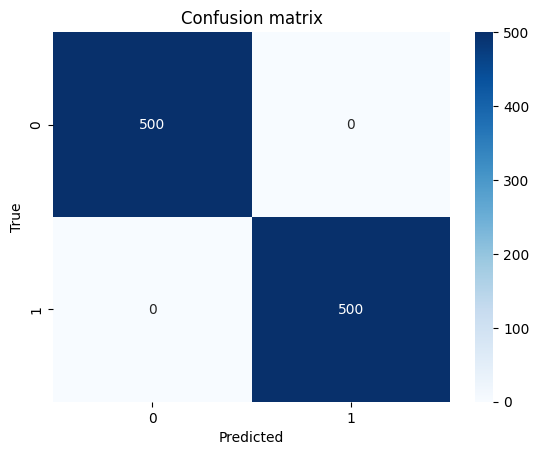

<Figure size 640x480 with 0 Axes>

In [6]:
model.evaluate(y, y_hat)